# $\mathrm{J} \Lambda \mathbb{N} 0$ & Natalia

AI tools have been used to review parts of this solution.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Analytical solutions to ODEs

## (a):  $\dot{x} = -x$

$$
\begin{align*}
\frac{dx}{dt} &= -x \\
\frac{1}{x}\,dx &= -dt \\
\int \frac{1}{x}\,dx &= \int -dt \\
\ln|x| &= -t + C \\
x &= C\exp(-t)
\end{align*}
$$

Initial condition:

$$
x(0) = C\exp(-0) \overset{!}{=} 1 \Rightarrow C = 1
$$

**Solution:**

$$
x(t) = \exp(-t)
$$

---

## (b):  $\dot{x} = -\frac{1}{x}$

$$
\begin{align*}
x\,dx &= -dt \\
\int x\,dx &= \int -dt \\
\frac{x^2}{2} &= -t + C \\
x &= \sqrt{2(C - t)}
\end{align*}
$$

Initial condition:

$$
x(0) = \sqrt{2(C - 0)} \overset{!}{=} 1 \Rightarrow C = \frac12
$$

**Solution:**

$$
x(t) = \sqrt{\,1 - 2t\,}
$$

---

## (c):  $\dot{x} = 1 - x$

$$
\begin{align*}
\frac{dx}{dt} &= 1 - x \\
\frac{1}{1-x}\,dx &= dt \\
\int \frac{1}{1-x}\,dx &= \int dt \\
-\ln|1-x| &= t + C \\
x &= 1 - C\exp(-t)
\end{align*}
$$

Initial condition:

$$
x(0) = 1 - C\exp(-0) \overset{!}{=} 0 \Rightarrow C = 1
$$

**Solution:**

$$
x(t) = 1 - \exp(-t)
$$

---

## (d):  $\dot{x} = x(1-x)$

Partial fractions:

$$
\frac{1}{x(1-x)} = \frac{1}{x} + \frac{1}{1-x}
$$

Integrate:

$$
\begin{align*}
\int\left(\frac{1}{x} + \frac{1}{1-x}\right)dx &= \int dt \\
\ln\left|\frac{x}{1-x}\right| &= t + C
\end{align*}
$$

Solve for $x$:

$$
\begin{align*}
\frac{x}{1-x} &= C\exp(t) \\
x &= \frac{C\exp(t)}{1 + C\exp(t)}
\end{align*}
$$

Initial condition:

$$
x(0) = \frac{C\exp(0)}{1 + C\exp(0)} \overset{!}{=} \frac12 \Rightarrow C = 1
$$

**Solution:**

$$
x(t) = \frac{\exp(t)}{1 + \exp(t)}
$$

---


In [2]:
def sol_1(t):
    return np.exp(-t)

def sol_2(t):
    return np.sqrt(2*t + 1)

def sol_3(t):
    return 1 - np.exp(-t)

def sol_4(t):
    return np.exp(t) / (1 + np.exp(t))

solutions = [sol_1, sol_2, sol_3, sol_4]

# 2. Numerical solutions to ODEs

# a) & b)

In [3]:
def func1(t, x):
    return -x

def func2(t, x):
    return 1/x

def func3(t, x):
    return 1-x

def func4(t, x):
    return x*(1-x)

functions = [func1, func2, func3, func4]

In [4]:
def euler(f_func, x_0, t_max, dt, *args, **kwargs):
    t = 0
    x = x_0

    x_t = [x_0]
    ts = [t]

    while t < t_max:
        t += dt
        ts.append(t)

        x = x + f_func(t, x, *args, **kwargs) * dt
        x_t.append(x)
        
    return np.array(ts), np.array(x_t)

In [5]:
times = []
numeric_solutions = []
for func, ic in zip([func1, func2, func3, func4], [1, 1, 0, 1/2]):
    ts, x_t = euler(f_func=func, x_0=ic, t_max=10, dt=0.01)
    times.append(np.array(ts))
    numeric_solutions.append(x_t)

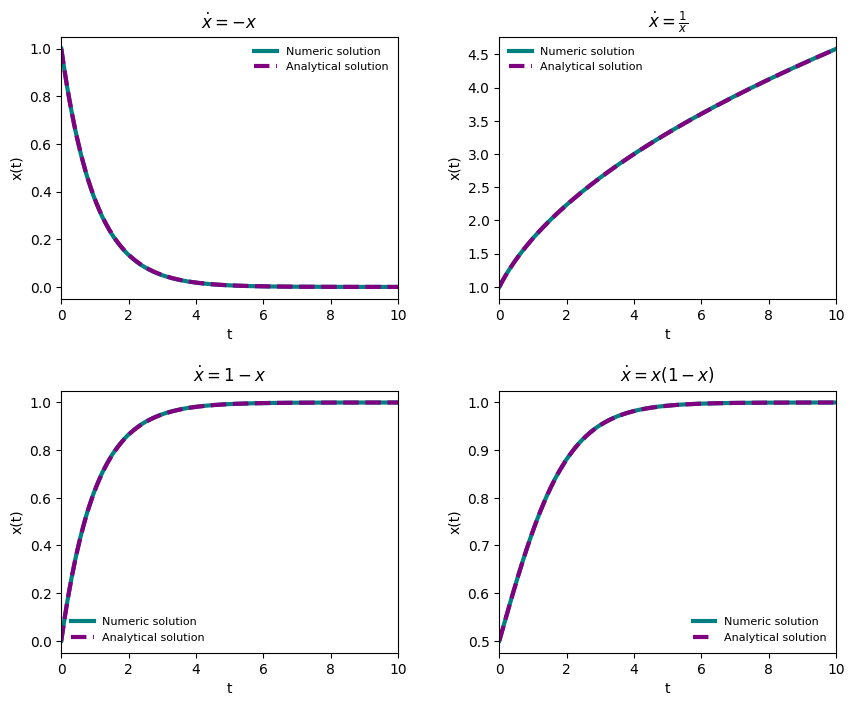

In [6]:
titles = ["$\\dot{x} = -x$", "$\\dot{x} = \\frac{1}{x}$", "$\\dot{x} = 1-x$", "$\\dot{x} = x(1-x)$"]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.35, wspace=0.3) 

for i, (ax, sol) in enumerate(zip([ax1, ax2, ax3, ax4], solutions)):

    ax.plot(times[i], numeric_solutions[i], label="Numeric solution", color="teal", linewidth=3)
    ax.plot(times[i], solutions[i](times[i]), linestyle="--", label="Analytical solution", color="purple", linewidth=3)
    ax.set_title(titles[i])

    ax.set_xlim([0, 10])
    ax.set_xlabel("t")
    ax.set_ylabel("x(t)")
    ax.legend(fontsize=8, loc="best", frameon=False)

plt.show()

# c)

In [7]:
from scipy.integrate import solve_ivp

In [8]:
def squared_error(array_a, array_b):
    s_err = [(b - a)**2 for a, b in zip(array_a, array_b)]
    return s_err

In [9]:
def compare_solutions(func, dt, x0, t_min, t_max, sol):
    
    ts = np.arange(t_min, t_max, dt)

    ana_solution = sol(ts)
    scipy_solution = solve_ivp(func, (t_min, t_max), [x0], t_eval=ts).y[0]
    numeric_solution = euler(f_func=func, x_0=x0, t_max=t_max, dt=dt)[1]

    qe_num = squared_error(ana_solution, numeric_solution)
    qe_sci = squared_error(ana_solution, scipy_solution)

    return ts, qe_num, qe_sci

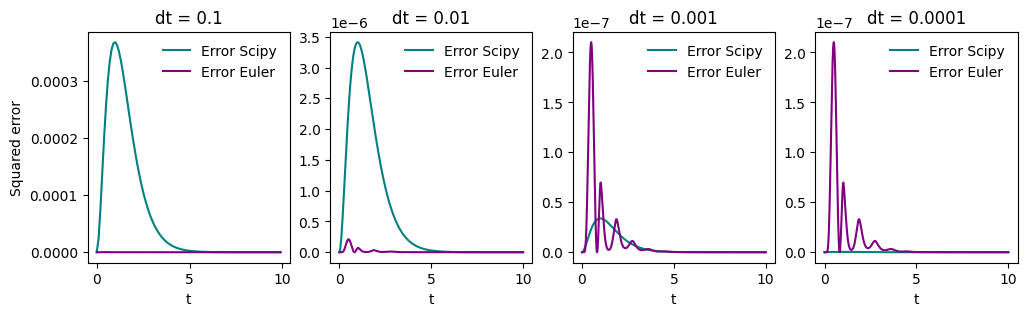

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 3))

for dt, ax in zip([0.1, 0.01, 0.001, 0.0001], [ax1, ax2, ax3, ax4]):
    ts, qe_num, qe_sci = compare_solutions(func=func1, dt=dt, x0=1, t_min=0, t_max=10, sol=sol_1)

    ax.plot(ts, qe_num, label="Error Scipy", color="teal")
    ax.plot(ts, qe_sci, label="Error Euler", color="purple")
    ax.set_title(f"dt = {dt}")
    ax.legend(frameon=False)
    ax.set_xlabel("t")
    if ax == ax1:
        ax.set_ylabel("Squared error")

plt.show()

# 3. Passive membrane

# a)

In [11]:
def dVdt(t, V, tau_m, E_m, R_m, I):
    return (-V + E_m + R_m*I[int(t/dt)])/tau_m

In [12]:
# Params 
simtime = 100 * 10**-3                  # 100 ms
dt = 0.1 * 10**-3                       # 0.1 ms simulation time step
R_m = 1 * 10**7                         # 10**7 Ohm
I_0 = 1 * 10**-9                        # 1 nA
tau_m = 10 * 10**-3                     # 10 ms 
E_m = -80 * 10**-3                      # 80 mV

t_array = np.arange(0, simtime + dt, dt)
I_ext = I_0 * np.ones_like(t_array)

In [13]:
ts, V_steady = euler(dVdt, x_0=E_m, tau_m=tau_m, E_m=E_m, R_m=R_m, I=I_ext, t_max=simtime, dt=dt)
ts_ms = ts/10**-3
V_steady_mV = V_steady/10**-3

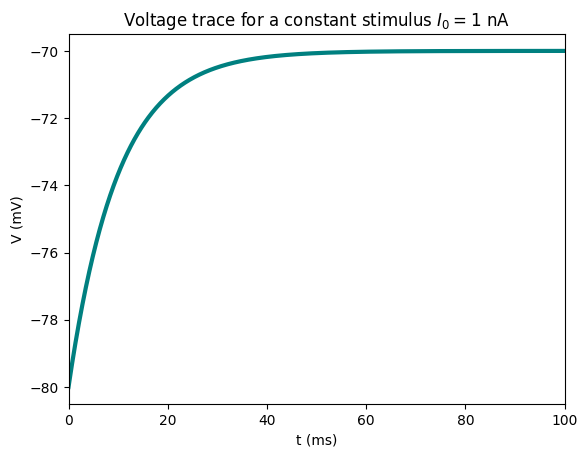

In [14]:
plt.plot(ts_ms, V_steady_mV, color="teal", linewidth=3)
plt.ylabel("V (mV)")
plt.xlabel("t (ms)")
plt.xlim([0, 100])
plt.title("Voltage trace for a constant stimulus $I_0 = 1$ nA")
plt.show()

# b)

In [15]:
from matplotlib.gridspec import GridSpec

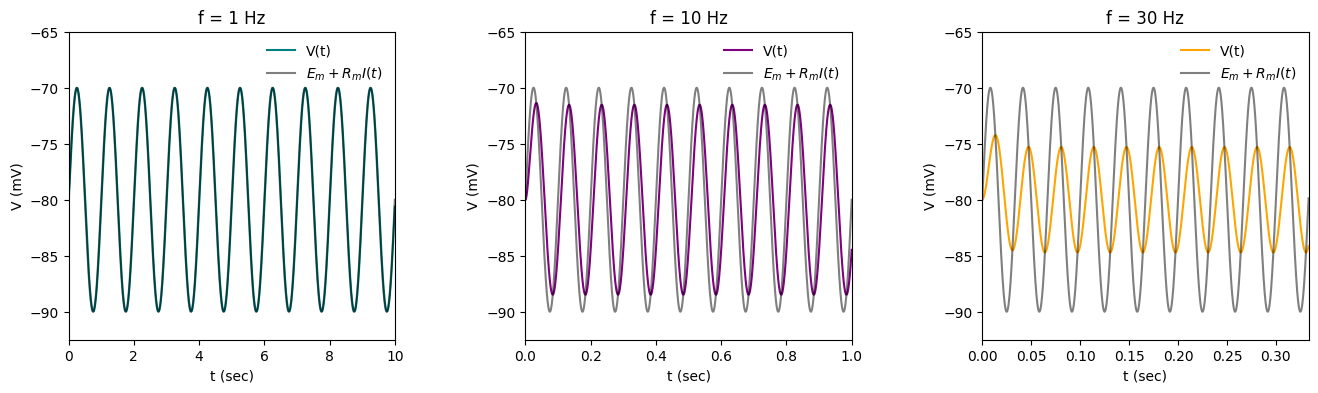

In [16]:
fig = plt.figure(figsize=(16, 4))
gs = GridSpec(1, 3, wspace=0.4)

for i, (f, c) in enumerate(zip([1, 10, 30], ["teal", "purple", "orange"])):
    
    T = 1 / f
    t_max = T * 10 
    t_array = np.arange(0, t_max+dt, dt)
    stim = I_0 * np.sin(2*np.pi*f*t_array)

    ts, V_t = euler(dVdt, x_0=E_m, tau_m=tau_m, E_m=E_m, R_m=R_m, I=stim, t_max=t_max, dt=dt)

    ts_ms = ts 
    V_t_mV = V_t / 10**-3
    input_mV = (E_m + R_m*stim) / 10**-3
    
    ax1 = fig.add_subplot(gs[0, i])
    ax1.plot(ts, V_t_mV, color=c, label="V(t)")
    ax1.plot(t_array, input_mV, color="black", alpha=0.5, label="$E_m + R_mI(t)$") 
    
    ax1.set_title(f"f = {f} Hz")
    ax1.legend(loc="upper right", frameon=False)
    
    ax1.set_ylim([-92.5, -65])
    ax1.set_xlim([0, t_max])
    ax1.set_xlabel("t (sec)")
    ax1.set_ylabel("V (mV)")

plt.show()

# c)

In [17]:
def A(nu):
    return I_0*R_m*np.sqrt(1 / (1 + (2*np.pi*nu*tau_m)**2))

def dphi(nu):
    return np.arctan(2*np.pi*nu*tau_m)

In [18]:
nu = np.arange(1, 100, 1)
A_calc = A(nu) / 10**-3
dphi_calc = dphi(nu)

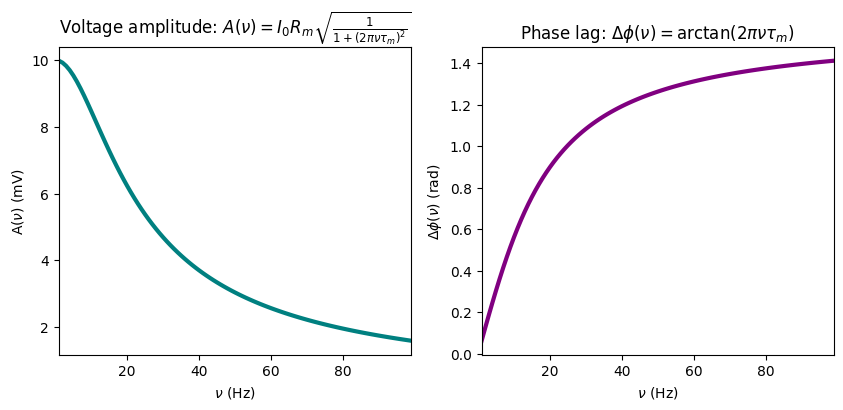

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(nu, A_calc, color="teal", linewidth=3)
ax1.set_ylabel("A($\\nu$) (mV)")
ax1.set_xlabel("$\\nu$ (Hz)")
ax1.set_xlim([min(nu), max(nu)])
ax1.set_title("Voltage amplitude: $A(\\nu) = I_0 R_m \\sqrt{\\frac{1}{1+(2\\pi\\nu\\tau_m)^2}}$")

ax2.plot(nu, dphi_calc, color="purple", linewidth=3)
ax2.set_ylabel("$\\Delta \\phi (\\nu)$ (rad)")
ax2.set_xlabel("$\\nu$ (Hz)")
ax2.set_xlim([min(nu), max(nu)])
ax2.set_title("Phase lag: $\\Delta\\phi (\\nu) = \\arctan(2\\pi\\nu\\tau_m)$")

plt.show()

# d)

In [20]:
A_approx = np.empty(len(nu))
dphi_approx = np.empty(len(nu))

for i, f in enumerate(nu):
    
    T = 1 / f
    t_max = T * 30 
    t_array = np.arange(0, t_max+dt, dt)
    stim = I_0 * np.sin(2*np.pi*f*t_array)

    ts, V_t = euler(dVdt, x_0=E_m, tau_m=tau_m, E_m=E_m, R_m=R_m, I=stim, t_max=t_max, dt=dt)

    V_t_stable = V_t[len(V_t) - int(len(V_t)/5):] / 10**-3
    A_approx[i] = (np.max(V_t_stable) - np.mean(V_t_stable))

    n_per = int(np.round(T / dt))
    V_last = V_t[-n_per:]
    I_last = stim[-n_per:]

    idx_I = np.argmax(I_last) + (len(stim) - n_per)  
    idx_V = np.argmax(V_last) + (len(V_t) - n_per)

    t_peak_I = ts[idx_I]
    t_peak_V = ts[idx_V]

    dphi_approx[i] = 2.0 * np.pi * f * (t_peak_V - t_peak_I)

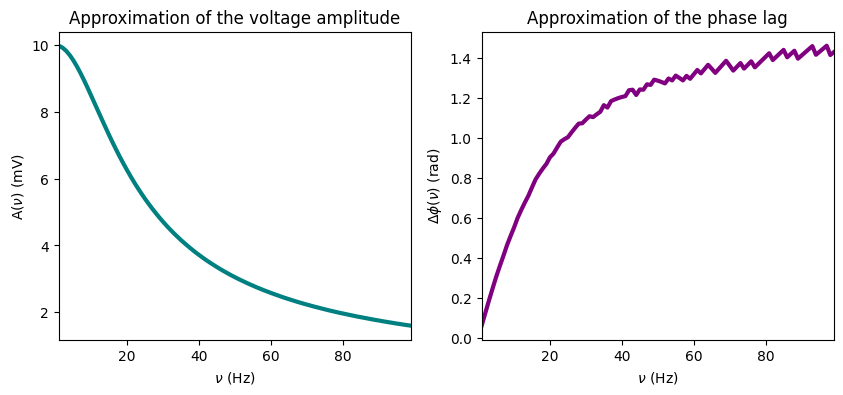

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(nu, A_approx, color="teal", linewidth=3)
ax1.set_ylabel("A($\\nu$) (mV)")
ax1.set_xlabel("$\\nu$ (Hz)")
ax1.set_xlim([min(nu), max(nu)])
ax1.set_title("Approximation of the voltage amplitude")

ax2.plot(nu, dphi_approx, color="purple", linewidth=3)
ax2.set_ylabel("$\\Delta \\phi (\\nu)$ (rad)")
ax2.set_xlabel("$\\nu$ (Hz)")
ax2.set_xlim([min(nu), max(nu)])
ax2.set_title("Approximation of the phase lag")

plt.show()